2219.029801074455   [46.91920265  4.19740683]
1774.7132952861168   [-41.67989538   6.12369304]
134.86831623038213   [11.25815138 -2.84997258]
426.8672367398427   [18.93585546  8.26441859]
314.2710555314345   [-2.51556964 17.54830376]
1523.115286813571   [ 19.2675453  -33.93931327]
25.228648337829878   [-1.05720305 -4.91029226]
3181.01891373759   [29.37534658 48.14673329]
1820.8247630034764   [-39.65755026  15.75130058]
713.7766983851088   [13.58493959 23.00491501]
1911.1934979769835   [-33.64591755  27.91318201]
737.9715566340572   [ 25.01618409 -10.59066052]
2751.420669678165   [-42.66901705 -30.50861605]
1076.076858547965   [29.53497604 14.27452447]
1005.2394432586681   [ 14.91813498 -27.97657399]
2291.999081748071   [  1.98302126 -47.83374027]
2013.8974029826045   [ 26.42276462 -36.27306043]
2360.9385097874615   [ -2.48694315 -48.52580369]
1286.8505629817998   [ -3.32027343 -35.71871145]
1200.8133848208545   [  3.71871898 -34.45264161]
644.4282413098807   [-12.08883834 -22.32237059]

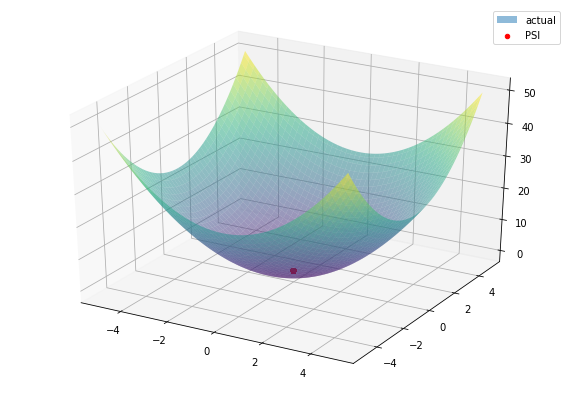

In [4]:
import random
import numpy as np 
import matplotlib.pyplot as plt

#function that models the problem
def fitness_function(position):
    return position[0]**2 + position[1]**2  

#Some variables to calculate the velocity
W = 0.55
c1 = 0.45
c2 = 0.85
target = 0

n_iterations = 100
target_error = 0.000001
n_particles = 30

particle_position_vector = np.array([np.array([(-1) ** (bool(random.getrandbits(1)))
 * random.random()*50, (-1)**(bool(random.getrandbits(1))) *
  random.random()*50]) for _ in range(n_particles)])
pbest_position = particle_position_vector
pbest_fitness_value = np.array([float('inf') for _ in range(n_particles)])
gbest_fitness_value = float('inf')
gbest_position = np.array([float('inf'), float('inf')])

velocity_vector = ([np.array([0, 0]) for _ in range(n_particles)])
iteration = 0
mins=[]
while iteration < n_iterations:
    for i in range(n_particles):
        fitness_cadidate = fitness_function(particle_position_vector[i])
        print(fitness_cadidate, ' ', particle_position_vector[i])
        mins.append((particle_position_vector[i]))
        
        if(pbest_fitness_value[i] > fitness_cadidate):
            pbest_fitness_value[i] = fitness_cadidate
            pbest_position[i] = particle_position_vector[i]

        if(gbest_fitness_value > fitness_cadidate):
            gbest_fitness_value = fitness_cadidate
            gbest_position = particle_position_vector[i]
    if(abs(gbest_fitness_value - target) < target_error):
      break
    
    for i in range(n_particles):
        new_velocity = (W*velocity_vector[i]) + (c1*random.random()) * (pbest_position[i] - particle_position_vector[i]) + (c2*random.random())*(gbest_position-particle_position_vector[i])

        new_position = new_velocity + particle_position_vector[i]
        particle_position_vector[i] = new_position

    iteration = iteration + 1
    
print("The best position is ", gbest_position, "in iteration number ", iteration)
fig = plt.figure(figsize=(10,7))
x_bounds=[-5,5]
y_bounds=[-5,5]
ax = fig.gca(projection="3d")
x = np.linspace(*x_bounds, 100)
y = np.linspace(*y_bounds, 100)
x, y = np.meshgrid(x, y)
z = x**2 + y**2

x1 = np.array([data[0] for data in mins])
y1 = np.array([data[1] for data in mins])
z1 = x1**2 + y1**2

c1 =ax.plot_surface(x, y, z, alpha=0.5, cmap="viridis",label="actual")
c1._facecolors2d=c1._facecolors3d
c1._edgecolors2d=c1._edgecolors3d
c2= ax.scatter3D(x1, y1, z1, color="red",label="PSI")
c2._facecolors2d=c1._facecolors3d
c2._edgecolors2d=c1._edgecolors3d
ax.legend()